In [6]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import signal

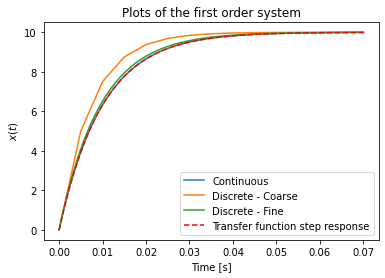

<Figure size 432x288 with 0 Axes>

In [7]:
# Parameters
r1 =  1000 # Ohm
c1 = 1e-5 # F
tau = r1*c1 # [s]
v_bar = 10 # V
start_time = 0.0 # [s]
end_time = 0.07 # [s]

# Continuous Solutions
time_continuous = np.linspace(start_time, end_time, 100)
xs_cont = v_bar * (1 - np.exp(-time_continuous/tau)) 


# Initial Conditions
times_discrete_fine_list = [0.0]
times_discrete_coarse_list = [0.0]
xs_discrete_fine_list = [0.0]
xs_discrete_coarse_list = [0.0]


# Delta time
del_t_fine = 0.001 # [s]
del_t_coarse = 0.005 # [s]


# Iterate fine time steps
for n in range(int((end_time - start_time)/del_t_fine)):
    xs_discrete_fine_list.append((1 - del_t_fine / tau) * xs_discrete_fine_list[-1] + v_bar * del_t_fine / tau)
    times_discrete_fine_list.append(times_discrete_fine_list[-1] + del_t_fine)

xs_discrete_fine = np.array(xs_discrete_fine_list)
times_discrete_fine = np.array(times_discrete_fine_list)


# Iterate coarse time steps
for n in range(int((end_time - start_time)/del_t_coarse)):
    xs_discrete_coarse_list.append((1 - del_t_coarse / tau) * xs_discrete_coarse_list[-1] + v_bar * del_t_coarse / tau)
    times_discrete_coarse_list.append(times_discrete_coarse_list[-1] + del_t_coarse)

xs_discrete_coarse = np.array(xs_discrete_coarse_list)
times_discrete_coarse = np.array(times_discrete_coarse_list)


# Transfer function
num = [v_bar * 1]
den = [tau, 1]
lti = signal.lti(num, den)
t, v_tf = signal.step(lti)


# Make plots
plt.plot(time_continuous, xs_cont, label = 'Continuous')
plt.plot(times_discrete_coarse, xs_discrete_coarse, label = 'Discrete - Coarse')
plt.plot(times_discrete_fine, xs_discrete_fine, label = 'Discrete - Fine')
plt.plot(t, v_tf, 'r--', label = "Transfer function step response")
plt.title("Plots of the first order system")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.show()
plt.savefig("first_order.svg", format="svg")

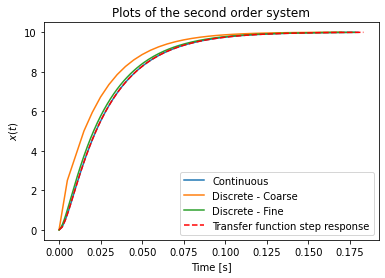

<Figure size 432x288 with 0 Axes>

In [8]:
# Parameters
r1 =  1000 # Ohm
r2 = r1
c1 = 1e-5 # F
c2 = c1
v_bar = 10 # V
start_time = 0.0 # [s]
end_time = 0.18 # [s]


# Continuous Solutions
lambda1 = ( - (r1 * (c1 + c2) + r2 * c2) + (np.sqrt((r1 * (c1 + c2) + r2 * c2) ** 2 - 4 * r1 * r2 * c1 * c2))) / (2 * r1 * r2 * c1 * c2)
lambda2 = ( - (r1 * (c1 + c2) + r2 * c2) - (np.sqrt((r1 * (c1 + c2) + r2 * c2) ** 2 - 4 * r1 * r2 * c1 * c2))) / (2 * r1 * r2 * c1 * c2)

coef1 = lambda2 * v_bar / (lambda1 - lambda2)
coef2 = - lambda1 * v_bar / (lambda1 - lambda2)

time_continuous = np.linspace(start_time, end_time, 100)
xs_cont = coef1 * np.exp(lambda1 * time_continuous) + coef2 * np.exp(lambda2 * time_continuous) + v_bar


# Initial Conditions
times_discrete_fine_list = [0.0, 0.0]
times_discrete_coarse_list = [0.0, 0.0]
xs_discrete_fine_list = [0.0, 0.0 + del_t_fine]
xs_discrete_coarse_list = [0.0, 0.0 + del_t_coarse]


# Delta time
del_t_fine = 0.001 # [s]
del_t_coarse = 0.005 # [s]


# Iterate fine time steps
for n in range(int((end_time - start_time)/del_t_fine) - 2):

    xs_discrete_fine_list.append((2 - del_t_fine * (r1 * (c1 + c2) + r2 * c2) / (r1 * r2 * c1 * c2)) * xs_discrete_fine_list[-1] + 
                                 (-1 + (del_t_fine * (r1 * (c1 + c2) + r2 * c2) - del_t_fine ** 2) / (r1 * r2 * c1 * c2)) * xs_discrete_fine_list[-2] + 
                                  del_t_fine ** 2 * v_bar / (r1 * r2 * c1 * c2))
    
    times_discrete_fine_list.append(times_discrete_fine_list[-1] + del_t_fine)

xs_discrete_fine = np.array(xs_discrete_fine_list)
times_discrete_fine = np.array(times_discrete_fine_list)


# Iterate coarse time steps
for n in range(int((end_time - start_time)/del_t_coarse) - 2):
    xs_discrete_coarse_list.append((2 - del_t_coarse * (r1 * (c1 + c2) + r2 * c2) / (r1 * r2 * c1 * c2)) * xs_discrete_coarse_list[-1] + 
                                 (-1 + (del_t_coarse * (r1 * (c1 + c2) + r2 * c2) - del_t_coarse ** 2) / (r1 * r2 * c1 * c2)) * xs_discrete_coarse_list[-2] + 
                                  del_t_coarse ** 2 * v_bar / (r1 * r2 * c1 * c2))
    times_discrete_coarse_list.append(times_discrete_coarse_list[-1] + del_t_coarse)

xs_discrete_coarse = np.array(xs_discrete_coarse_list)
times_discrete_coarse = np.array(times_discrete_coarse_list)

# Transfer function
num = [1 * v_bar]
den = [r1 * r2 * c1 * c2, r1 * (c1 + c2) + r2 * c2, 1]
lti = signal.lti(num, den)
t, v_tf = signal.step(lti)

# Make plots
plt.plot(time_continuous, xs_cont, label = 'Continuous')
plt.plot(times_discrete_coarse, xs_discrete_coarse, label = 'Discrete - Coarse')
plt.plot(times_discrete_fine, xs_discrete_fine, label = 'Discrete - Fine')
plt.plot(t, v_tf, 'r--', label = "Transfer function step response")
plt.title("Plots of the second order system")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.show()
plt.savefig("second_order.svg", format="svg")
